### In this notebook we will be working on the rooms image dataset and will implemnet the alexnet architecture of CNN

In [1]:
# import libraries
import tensorflow
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPool2D, Flatten, Conv2D, Dropout

In [2]:
# load the dataset
d_set=os.listdir("House_Room_Dataset")
d_set

['Bathroom', 'Bedroom', 'Dinning', 'Kitchen', 'Livingroom']

### in our dataset we have images of bathroom, bedroom, dining, kitchen and living room 

In [3]:
# now make a list to collect all the images from the above categories as follows
list_of_images=[]

# loop around the names of the columns
for col in d_set:
    all_cols=os.listdir('House_Room_Dataset' + '/' + col)

    # loop around the collected columns to get the images and append in the above list
    # we will extract the images along with the naame of the columns to distinguish the category
    for rooms in all_cols:
        list_of_images.append((col, str('House_Room_Dataset' + '/' + col)+ '/' + rooms))
        

# a look at the list of images
for i in range(15):
    print(list_of_images[i])
    i+=1

('Bathroom', 'House_Room_Dataset/Bathroom/bath_1.jpg')
('Bathroom', 'House_Room_Dataset/Bathroom/bath_100.jpg')
('Bathroom', 'House_Room_Dataset/Bathroom/bath_1001.jpg')
('Bathroom', 'House_Room_Dataset/Bathroom/bath_1003.jpg')
('Bathroom', 'House_Room_Dataset/Bathroom/bath_1004.jpg')
('Bathroom', 'House_Room_Dataset/Bathroom/bath_1005.jpg')
('Bathroom', 'House_Room_Dataset/Bathroom/bath_1006.jpg')
('Bathroom', 'House_Room_Dataset/Bathroom/bath_1007.jpg')
('Bathroom', 'House_Room_Dataset/Bathroom/bath_1010.jpg')
('Bathroom', 'House_Room_Dataset/Bathroom/bath_1011.jpg')
('Bathroom', 'House_Room_Dataset/Bathroom/bath_1012.jpg')
('Bathroom', 'House_Room_Dataset/Bathroom/bath_1013.jpg')
('Bathroom', 'House_Room_Dataset/Bathroom/bath_1014.jpg')
('Bathroom', 'House_Room_Dataset/Bathroom/bath_1016.jpg')
('Bathroom', 'House_Room_Dataset/Bathroom/bath_1018.jpg')


### result: As we can see that we have successfully created a list of images along with their categories

In [4]:
# now to create a dataframe from the above created list
images_df=pd.DataFrame(data=list_of_images, columns=['image_type', 'image'])

# print the top and bottom images
print(images_df.head())
print(images_df.tail())

  image_type                                      image
0   Bathroom     House_Room_Dataset/Bathroom/bath_1.jpg
1   Bathroom   House_Room_Dataset/Bathroom/bath_100.jpg
2   Bathroom  House_Room_Dataset/Bathroom/bath_1001.jpg
3   Bathroom  House_Room_Dataset/Bathroom/bath_1003.jpg
4   Bathroom  House_Room_Dataset/Bathroom/bath_1004.jpg
      image_type                                         image
5245  Livingroom  House_Room_Dataset/Livingroom/living_995.jpg
5246  Livingroom  House_Room_Dataset/Livingroom/living_996.jpg
5247  Livingroom  House_Room_Dataset/Livingroom/living_997.jpg
5248  Livingroom  House_Room_Dataset/Livingroom/living_998.jpg
5249  Livingroom  House_Room_Dataset/Livingroom/living_999.jpg


In [5]:
# count the images of each category
image_count=images_df['image_type'].value_counts()
print("Total number of images are: ", len(images_df))
print("\n Rooms in the each category are: \n",image_count)

Total number of images are:  5250

 Rooms in the each category are: 
 Livingroom    1273
Bedroom       1248
Dinning       1158
Kitchen        965
Bathroom       606
Name: image_type, dtype: int64


### we have successfuly loaded the images

In [6]:
# since the sizes of images are not equal also the alexnet accepts the sizes of 227 pixels
# therefore, we first resize the images as follows
import cv2
# cv2 is used for image and video processing like read, resize etc

# directory path
dir_path="House_Room_Dataset/"
# image size var
image_size=227

# list to store the resized images
resized_images=[]
# list of labels
labels=[]

# loop to fetch the filenames in which images are present
for i in d_set:
    # construct the path to the specific folder
    data_path=dir_path + str(i)
    filenames=[i for i in os.listdir(data_path)]

    # loop to read the images and resize them
    for f in filenames:
        # read the images from the folder
        img=cv2.imread(data_path + '/' + f)
        # resize the images
        img=cv2.resize(img, (image_size, image_size))
        # append the resized images
        resized_images.append(img)
        labels.append(i)

### images are resize

In [7]:
# convert the list of images into an array
# images are converted into an array because our model only learns from the numeric data not from the string
images=np.array(resized_images)

# as the image is of 0-256 pixels therefore we will devide it by 255
images=images.astype('float32')/255.0
images.shape

(5250, 227, 227, 3)

### we have total 5250 images of the shape 227 * 227 * 3

In [8]:
# since the labes or say the image categories are in the string format like bedroom, bathroom etc, we need to convert them into numbers too
# for this we will make use of the laabelencoder from sklearn aas follows
from sklearn.preprocessing  import LabelEncoder, OneHotEncoder

# since the output will be either bedroom, bathroom, or any of the categories, so our Y means output column will contain the categories
# for this we need to separate the categories as follows and then apply labelencoder
y=images_df['image_type'].values

# encoder
en=LabelEncoder()
# apply on y
y=en.fit_transform(y)

y

array([0, 0, 0, ..., 4, 4, 4])

### since we have 5 categories therefore we have 0-4 encoded labels

In [9]:
# now apply OneHotEncoder to convert the scalar output as mentioned above, in the vector ouptut
# after that the sshape will be like (5250, 5)
y=y.reshape(-1, 1)
ohe=OneHotEncoder()
y=ohe.fit_transform(y).toarray()
y.shape

(5250, 5)

In [10]:
# train test split the data
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# shuffle the images
images, y=shuffle(images, y, random_state=1)

# split the data
X_train,  X_test, y_train, y_test=train_test_split(images, y, test_size=0.2)


In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4200, 227, 227, 3), (4200, 5), (1050, 227, 227, 3), (1050, 5))

### since all of our work is done and now it's time to make the architecture and fit the data into it

In [12]:
# now we will create the architecture as follows 
model=Sequential()

# now adding the layers as mentioned in the architecture as follows
# first conv layer
model.add(Conv2D(filters=96, kernel_size=(11, 11), strides=4, padding='valid', input_shape=(227, 227, 3), activation='relu'))
# max pooling 
model.add(MaxPool2D(pool_size=(3, 3), strides=2, padding='valid'))

# second conv layer
model.add(Conv2D(filters=256, kernel_size=(5, 5), padding='valid', strides=(1, 1), activation='relu'))
# max pooling
model.add(MaxPool2D(pool_size=(3, 3), strides=2, padding='valid'))

# third conv layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
# 4th layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
# 5th layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
# max pooling
model.add(MaxPool2D(pool_size=(3, 3), strides=2, padding='valid'))

# now faltten the model
model.add(Flatten())

# now fully connected layers
model.add(Dense(4096, input_shape=(227*227*3, ), activation='relu'))
# here dropout is used to avoid overfitting problem
model.add(Dropout(0.4))

# adding another fully connected layer as follows
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.4))

# add the output layer as follows
# 5 are the categories therefore we will have 5 in the output
model.add(Dense(5, activation='softmax'))

# summary of the model
model.summary()

c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 23, 23, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     6,295,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │        20,485 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,287,045 (104.09 MB)

 Trainable params: 27,287,045 (104.09 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# now compile the model
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [14]:
# evaluet the accuracy of the model
# model.evaluate()

In [15]:
# fit the data into the model created above
model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.2375 - loss: 1.5989
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.2423 - loss: 1.5813
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.2607 - loss: 1.5769
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.2549 - loss: 1.5725
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.2657 - loss: 1.5741
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.2758 - loss: 1.5678
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.2829 - loss: 1.5491
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.2917 - loss: 1.5382
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.2851 - loss: 1.5373
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.2883 - loss: 1.5277
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.2958 - loss: 1.5227
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.2955 -

### since the model is created, now we will make some predictions as follows

In [19]:
# get the image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path='input_image.jpeg'

# resize the image
img=image.load_img(img_path, target_size=(227, 227))
# change inot an array
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
x=preprocess_input(x)

print(x.shape)

(1, 227, 227, 3)


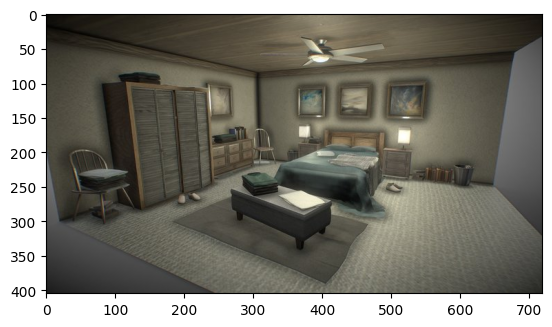

In [21]:
# to see the image
from matplotlib.pyplot import  imread, imshow
img=imread(img_path)
imshow(img)

#

In [22]:
# make the prediction
result=model.predict(x)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


array([[0., 0., 1., 0., 0.]], dtype=float32)

In [23]:
# see the d_set
d_set

['Bathroom', 'Bedroom', 'Dinning', 'Kitchen', 'Livingroom']

## Result:
### the model has predicted the Dinning room for the input image
### however the image is of the bedroom, so here the model needs to be more effecient